# 02 — Exploratory Data Analysis (EDA)
**Requires:** Run `01_load_and_filter.ipynb` first.

Explores the distribution of active Greek players by position, age, and market value.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

OUTPUTS_PATH = "../outputs/"
FIGURES_PATH = "../outputs/figures/"

greek_active = pd.read_parquet(OUTPUTS_PATH + "greek_active.parquet")
greek        = pd.read_parquet(OUTPUTS_PATH + "greek_all.parquet")

print(f"Active players: {len(greek_active)}")
greek_active.head(3)

Active players: 195


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,34296,Athanasios,Papageorgiou,Athanasios Papageorgiou,2025,4603,athanasios-papageorgiou,Greece,Larisa,Greece,...,183.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/athanasios-pap...,GR1,Athlitiki Enosi Larisas,25000.0,500000.0,38.0
1,63487,Nikolaos,Karelis,Nikolaos Karelis,2025,3385,nikolaos-karelis,Greece,Heraklion,Greece,...,173.0,2026-06-30 00:00:00,Target Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nikolaos-karel...,GR1,Panserraikos Serres,350000.0,4500000.0,34.0
2,64352,Kostas,Lamprou,Kostas Lamprou,2025,132,kostas-lamprou,Greece,Cholargos,Greece,...,180.0,2027-06-30 00:00:00,Forza Sports Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kostas-lamprou...,NL1,Nooit Opgeven Altijd Doorzetten Aangenaam Door...,150000.0,1250000.0,34.0


## 2.1 Position Distribution

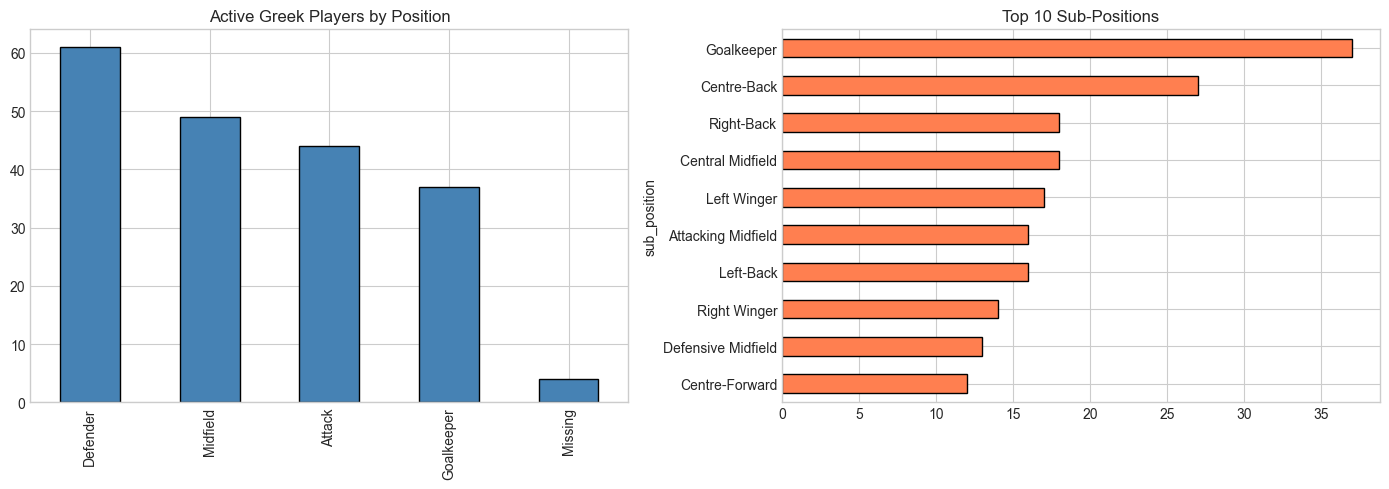

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

greek_active["position"].value_counts().plot(
    kind="bar", ax=axes[0], color="steelblue", edgecolor="black")
axes[0].set_title("Active Greek Players by Position")
axes[0].set_xlabel("")

greek_active["sub_position"].value_counts().head(10).plot(
    kind="barh", ax=axes[1], color="coral", edgecolor="black")
axes[1].set_title("Top 10 Sub-Positions")
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_positions.png", dpi=150)
plt.show()

## 2.2 Age Distribution

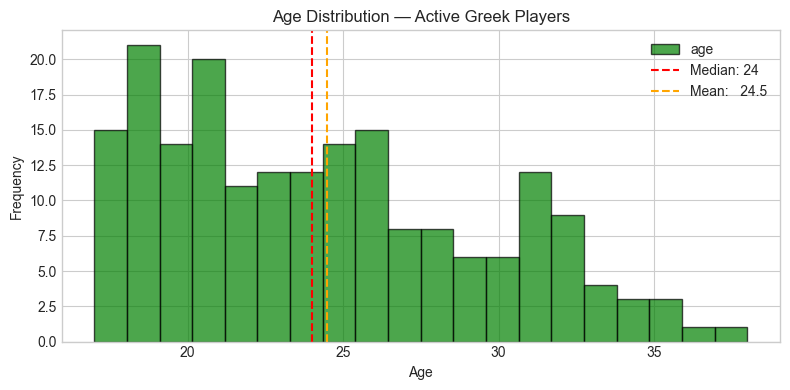

count    195.000000
mean      24.492308
std        4.915124
min       17.000000
25%       20.000000
50%       24.000000
75%       28.000000
max       38.000000
Name: age, dtype: float64


In [12]:
plt.figure(figsize=(8, 4))

greek_active["age"].dropna().plot(kind="hist", bins=20, color="green", edgecolor="black", alpha=0.7)
plt.axvline(greek_active["age"].median(), color="red",    linestyle="--",
            label=f'Median: {greek_active["age"].median():.0f}')
plt.axvline(greek_active["age"].mean(),   color="orange", linestyle="--",
            label=f'Mean:   {greek_active["age"].mean():.1f}')
plt.title("Age Distribution — Active Greek Players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_age_distribution.png", dpi=150)
plt.show()

print(greek_active["age"].describe())

## 2.3 Top 15 Most Valuable Greek Players Ever (Peak Value)

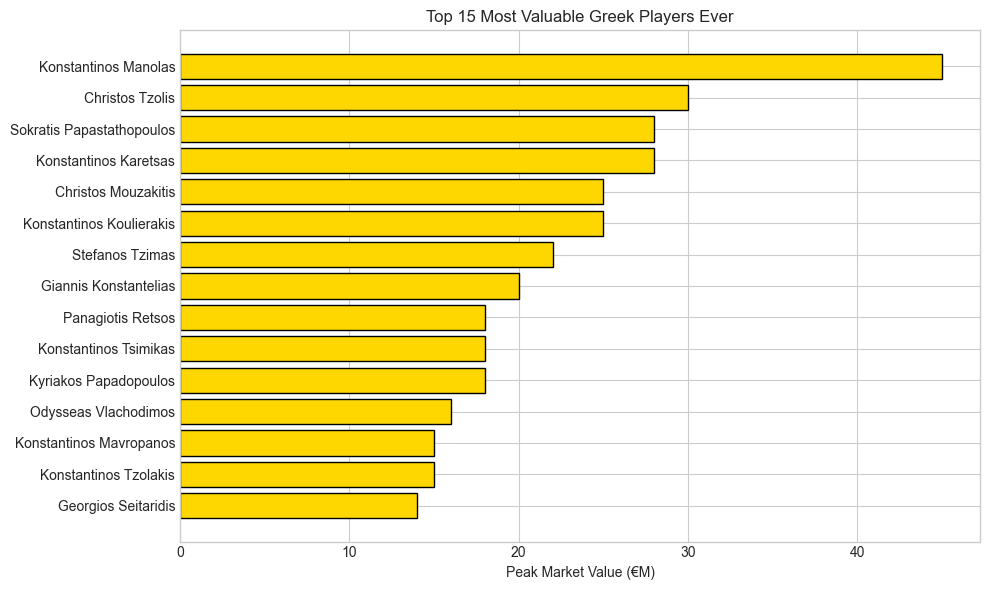

,name,position,highest_market_value_in_eur,current_club_name,age
260,Konstantinos Manolas,Defender,45000000.0,US Salernitana 1919,34.0
865,Christos Tzolis,Attack,30000000.0,Club Brugge Koninklijke Voetbalvereniging,24.0
128,Sokratis Papastathopoulos,Defender,28000000.0,Real Betis Balompié S.A.D.,37.0
1213,Konstantinos Karetsas,Midfield,28000000.0,Koninklijke Racing Club Genk,18.0
1211,Christos Mouzakitis,Midfield,25000000.0,Olympiakos Syndesmos Filathlon Peiraios,19.0
1093,Konstantinos Koulierakis,Defender,25000000.0,Verein für Leibesübungen Wolfsburg,22.0
1207,Stefanos Tzimas,Attack,22000000.0,Brighton and Hove Albion Football Club,20.0
1069,Giannis Konstantelias,Midfield,20000000.0,Panthessalonikios Athlitikos Omilos Konstantin...,22.0
685,Panagiotis Retsos,Defender,18000000.0,Olympiakos Syndesmos Filathlon Peiraios,27.0
718,Konstantinos Tsimikas,Defender,18000000.0,Associazione Sportiva Roma,29.0


In [13]:
top15 = (
    greek[["name", "position", "highest_market_value_in_eur", "current_club_name", "age"]]
    .dropna(subset=["highest_market_value_in_eur"])
    .sort_values("highest_market_value_in_eur", ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
plt.barh(top15["name"], top15["highest_market_value_in_eur"] / 1e6, color="gold", edgecolor="black")
plt.xlabel("Peak Market Value (€M)")
plt.title("Top 15 Most Valuable Greek Players Ever")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_top15_peak_value.png", dpi=150)
plt.show()

top15

## 2.4 Current Market Value Distribution

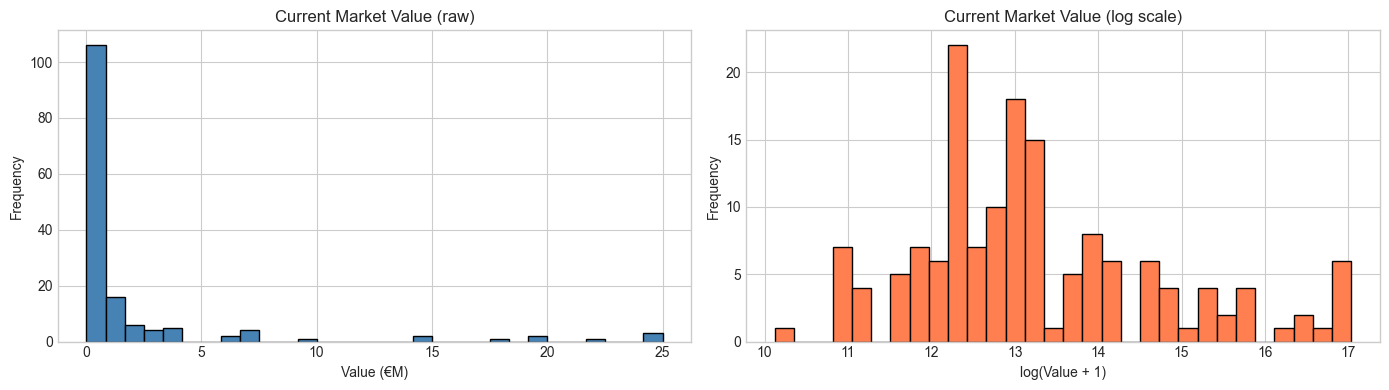

count     0.000153
mean      2.163725
std       4.977682
min       0.025000
25%       0.200000
50%       0.400000
75%       1.000000
max      25.000000
Name: market_value_in_eur, dtype: float64


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

(greek_active["market_value_in_eur"] / 1e6).plot(
    kind="hist", bins=30, ax=axes[0], color="steelblue", edgecolor="black")
axes[0].set_title("Current Market Value (raw)")
axes[0].set_xlabel("Value (€M)")

np.log1p(greek_active["market_value_in_eur"]).plot(
    kind="hist", bins=30, ax=axes[1], color="coral", edgecolor="black")
axes[1].set_title("Current Market Value (log scale)")
axes[1].set_xlabel("log(Value + 1)")

plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_value_distribution.png", dpi=150)
plt.show()

print(greek_active["market_value_in_eur"].describe() / 1e6)

## 2.5 Missing Values Overview

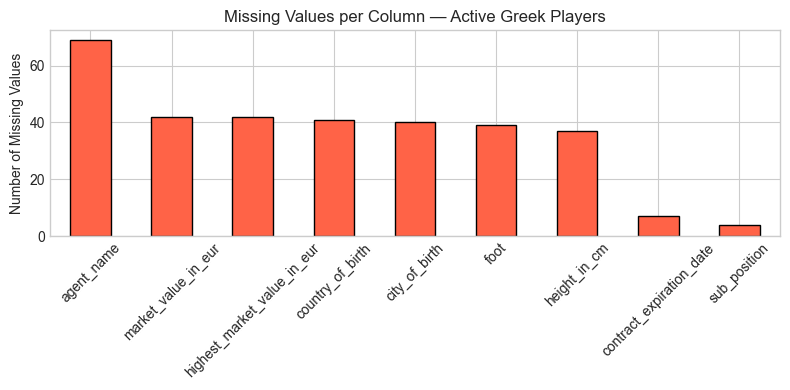

Columns with missing values: 9
agent_name                     69
market_value_in_eur            42
highest_market_value_in_eur    42
country_of_birth               41
city_of_birth                  40
foot                           39
height_in_cm                   37
contract_expiration_date        7
sub_position                    4
dtype: int64


In [15]:
missing = greek_active.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 4))
missing.plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Missing Values per Column — Active Greek Players")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_missing_values.png", dpi=150)
plt.show()

print(f"Columns with missing values: {len(missing)}")
print(missing)

## 2.6 Market Value by Position

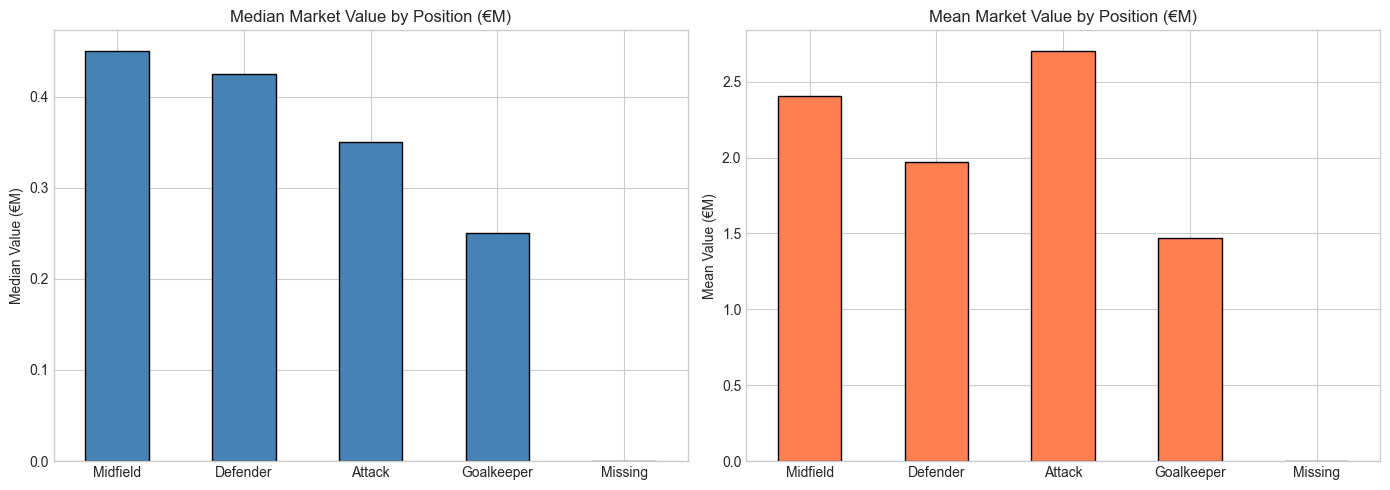

            median      mean  count
position                           
Midfield     0.450  2.402564   39.0
Defender     0.425  1.969196   56.0
Attack       0.350  2.702206   34.0
Goalkeeper   0.250  1.466667   24.0
Missing        NaN       NaN    0.0


In [16]:
value_by_pos = (
    greek_active.groupby("position")["market_value_in_eur"]
    .agg(["median", "mean", "count"])
    .sort_values("median", ascending=False)
    / 1e6
)
value_by_pos["count"] = value_by_pos["count"] * 1e6  # restore count to real number

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

value_by_pos["median"].plot(kind="bar", ax=axes[0], color="steelblue", edgecolor="black")
axes[0].set_title("Median Market Value by Position (€M)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Median Value (€M)")
axes[0].tick_params(axis='x', rotation=0)

value_by_pos["mean"].plot(kind="bar", ax=axes[1], color="coral", edgecolor="black")
axes[1].set_title("Mean Market Value by Position (€M)")
axes[1].set_xlabel("")
axes[1].set_ylabel("Mean Value (€M)")
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_value_by_position.png", dpi=150)
plt.show()

print(value_by_pos)

## 2.7 Age vs Market Value (Scatter)

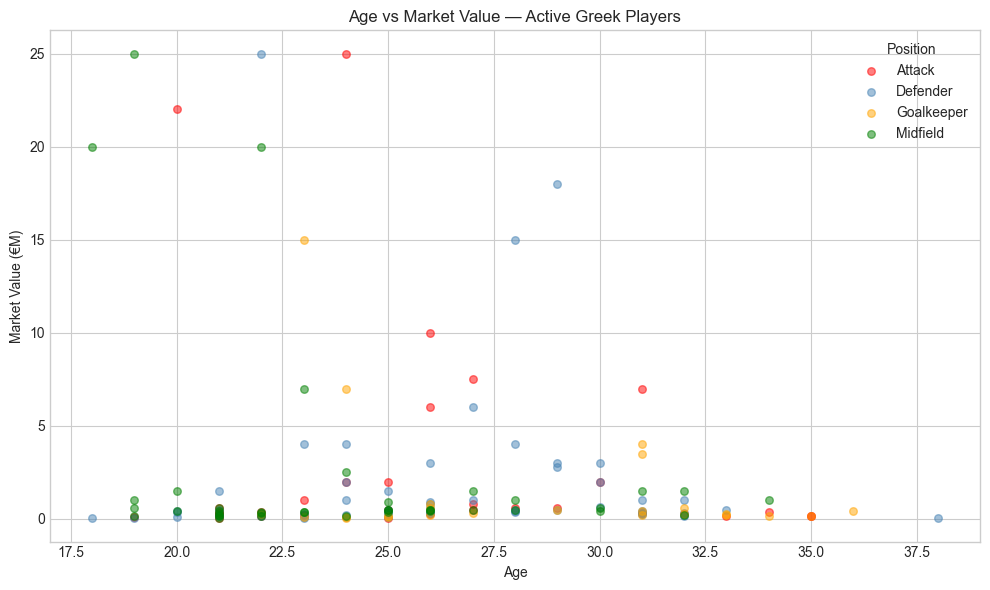

In [17]:
df_scatter = greek_active[["age", "market_value_in_eur", "position"]].dropna()

colors = {"Defender": "steelblue", "Midfield": "green",
          "Attack": "red", "Goalkeeper": "orange"}

plt.figure(figsize=(10, 6))
for pos, group in df_scatter.groupby("position"):
    plt.scatter(group["age"], group["market_value_in_eur"] / 1e6,
                label=pos, alpha=0.5, color=colors.get(pos, "gray"), s=30)

plt.xlabel("Age")
plt.ylabel("Market Value (€M)")
plt.title("Age vs Market Value — Active Greek Players")
plt.legend(title="Position")
plt.tight_layout()
plt.savefig(FIGURES_PATH + "02_age_vs_value.png", dpi=150)
plt.show()